In [ ]:
import random
import numpy
import keras
import math
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
import seaborn as sns
from tensorflow import keras
from IPython import display
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.datasets import mnist

## Auto-Encoder for classification

In [ ]:
import keras
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


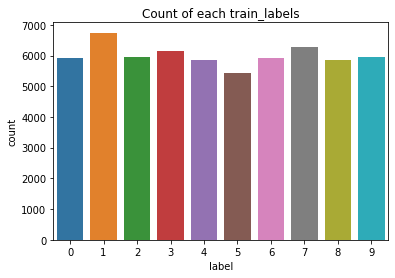

In [ ]:
g = sns.countplot(train_labels)
plt.title("Count of each train_labels")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

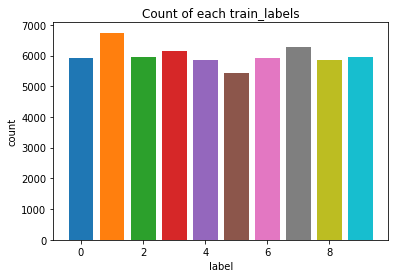

In [ ]:
unique, counts = numpy.unique(train_labels, return_counts=True)
data=dict(zip(unique, counts))

df = pd.DataFrame({'count': data}).reset_index()
groups = df.groupby('index')

fig, ax = plt.subplots(figsize=(6,4))

for name,group in groups:
   plt.bar(name, group['count'], label=name)

plt.title("Count of each train_labels")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

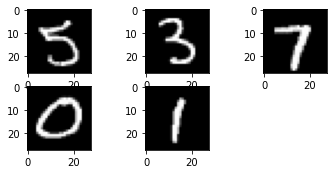

In [ ]:
c=0
lent=len(train_labels)
while(c<5):
  i = random.randint(0, int(lent))
  pyplot.subplot(330 +1+ c)
  pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
  c +=1
pyplot.show()

In [ ]:
#normalize
x_train = train_images/255.0
x_test = test_images/255.0

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(500,activation="LeakyReLU" ),
    keras.layers.Dense(250,activation="LeakyReLU"),
    keras.layers.Dense(100,activation="LeakyReLU"),
    keras.layers.Dense(30,activation="LeakyReLU")
])
decoder =  keras.models.Sequential([
    keras.layers.Dense(30, input_shape = (30,),activation="LeakyReLU"),
    keras.layers.Dense(100,activation="LeakyReLU"),
    keras.layers.Dense(250,activation="LeakyReLU"),
    keras.layers.Dense(500,activation="LeakyReLU"),
    keras.layers.Dense(784,activation="sigmoid"),
    keras.layers.Reshape((28, 28))
])
img = keras.layers.Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model3_2 = keras.models.Model(inputs = img, outputs = output)

model3_2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy","mse","mae"])

history3_2=model3_2.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=0.15)


Epoch 1/50
1594/1594 [==============================] - 39s 23ms/step - loss: 0.1393 - accuracy: 0.2127 - mse: 0.0256 - mae: 0.0661 - val_loss: 0.1067 - val_accuracy: 0.2641 - val_mse: 0.0146 - val_mae: 0.0438
Epoch 2/50
1594/1594 [==============================] - 35s 22ms/step - loss: 0.1000 - accuracy: 0.2699 - mse: 0.0125 - mae: 0.0390 - val_loss: 0.0953 - val_accuracy: 0.2840 - val_mse: 0.0110 - val_mae: 0.0355
Epoch 3/50
1594/1594 [==============================] - 35s 22ms/step - loss: 0.0928 - accuracy: 0.2833 - mse: 0.0102 - mae: 0.0339 - val_loss: 0.0911 - val_accuracy: 0.2990 - val_mse: 0.0095 - val_mae: 0.0324
Epoch 4/50
1594/1594 [==============================] - 40s 25ms/step - loss: 0.0888 - accuracy: 0.2910 - mse: 0.0090 - mae: 0.0311 - val_loss: 0.0890 - val_accuracy: 0.3019 - val_mse: 0.0089 - val_mae: 0.0307
Epoch 5/50
1594/1594 [==============================] - 35s 22ms/step - loss: 0.0868 - accuracy: 0.2957 - mse: 0.0083 - mae: 0.0296 - val_loss: 0.0866 - val_acc

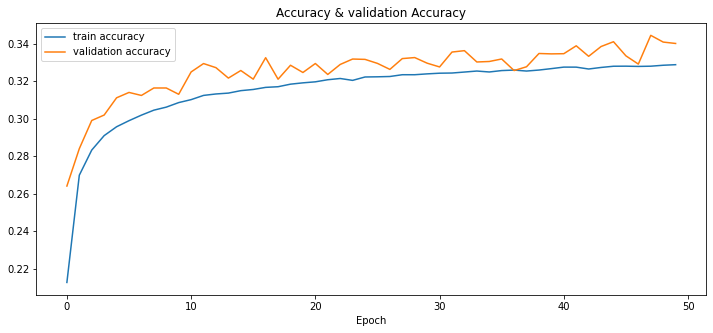

In [ ]:
fig3_2, ax3_2 = plt.subplots(figsize=(12,5))
ax3_2.plot(history3_2.history["accuracy"], label="train accuracy")
ax3_2.plot(history3_2.history["val_accuracy"], label="validation accuracy")
plt.title("Accuracy & validation Accuracy")
plt.xlabel("Epoch")
ax3_2.legend()

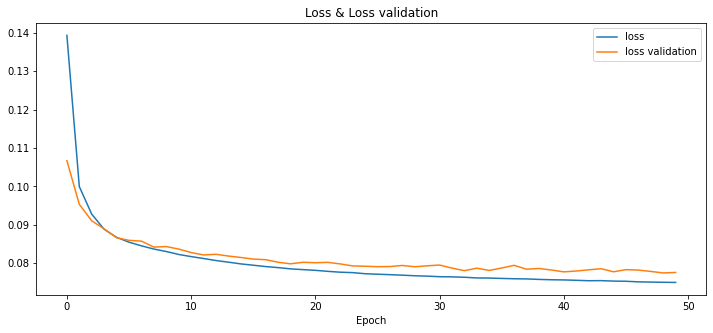

In [ ]:
fig3_22, ax3_22 = plt.subplots(figsize=(12,5))
ax3_22.plot(history3_2.history["loss"], label="loss")
ax3_22.plot(history3_2.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax3_22.legend()

In [ ]:
modelfc=keras.models.Sequential([
    keras.layers.Dense(30, input_shape = (30,),activation="LeakyReLU"),
    keras.layers.Dense(200,activation="ReLU" ),
    keras.layers.Dense(100,activation="ReLU"),
    keras.layers.Dense(10,activation="softmax")
])

In [ ]:
img = keras.layers.Input(shape = (28, 28))
outencoder3 = encoder(img)
output = modelfc(outencoder3)
model3_3 = keras.models.Model(inputs = img, outputs = output)
for layer in encoder.layers:  # برای فیریز کردن لایه های انکدر- که دیگر در این مرحله آموزش داده نشوند
  layer.trainable = False

In [ ]:
model3_3.compile(optimizer ="adam",
                 loss = "sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history3_3=model3_3.fit(x_train, train_labels,epochs=50, batch_size=32, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 11s 6ms/step - loss: 0.3831 - accuracy: 0.8795 - mse: 27.3546 - mae: 4.3700 - val_loss: 0.1730 - val_accuracy: 0.9490 - val_mse: 27.4945 - val_mae: 4.3944
Epoch 2/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.1551 - accuracy: 0.9518 - mse: 27.3668 - mae: 4.3700 - val_loss: 0.1246 - val_accuracy: 0.9630 - val_mse: 27.4983 - val_mae: 4.3944
Epoch 3/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.1149 - accuracy: 0.9645 - mse: 27.3692 - mae: 4.3700 - val_loss: 0.1034 - val_accuracy: 0.9694 - val_mse: 27.4990 - val_mae: 4.3944
Epoch 4/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0929 - accuracy: 0.9704 - mse: 27.3704 - mae: 4.3700 - val_loss: 0.1055 - val_accuracy: 0.9678 - val_mse: 27.4996 - val_mae: 4.3944
Epoch 5/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0765 - accuracy: 0.9752 - mse: 27.3712 - mae: 4.3700 - val_loss: 0.0933 - val

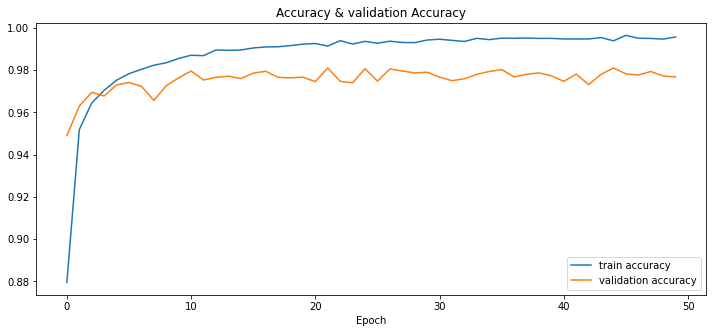

In [ ]:
fig3_3, ax3_3 = plt.subplots(figsize=(12,5))
ax3_3.plot(history3_3.history["accuracy"], label="train accuracy")
ax3_3.plot(history3_3.history["val_accuracy"], label="validation accuracy")
plt.title("Accuracy & validation Accuracy")
plt.xlabel("Epoch")
ax3_3.legend()

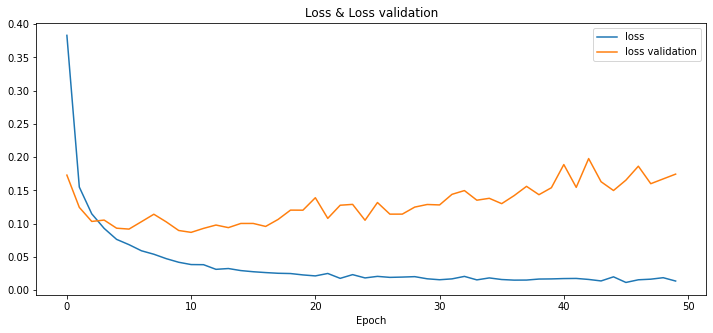

In [ ]:
fig3_32, ax3_32 = plt.subplots(figsize=(12,5))
ax3_32.plot(history3_3.history["loss"], label="loss")
ax3_32.plot(history3_3.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax3_32.legend()

In [ ]:
loss ,accuracy , mse, mae= model3_3.evaluate(x_test, test_labels)
print(f'Accuracy = {accuracy*100:.2f}%')

313/313 [==============================] - 4s 11ms/step - loss: 0.1364 - accuracy: 0.9780 - mse: 27.3395 - mae: 4.3630
Accuracy = 97.80%


313/313 [==============================] - 1s 4ms/step


Text(69.0, 0.5, 'Truth')

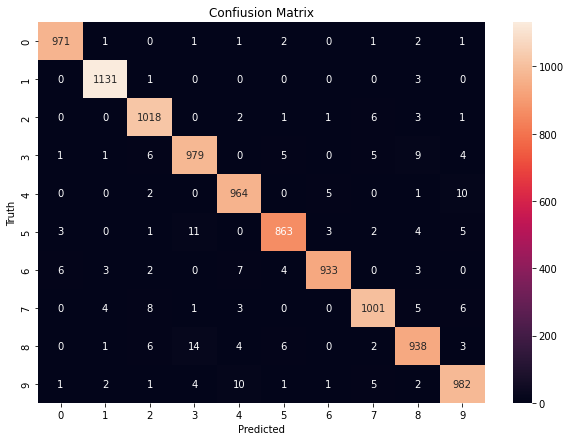

In [ ]:
import seaborn as sn
y_predicted = model3_3.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cnfnmtrx = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cnfnmtrx, annot=True, fmt='d')
plt.title("Confiusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#---------------------------------------------------------------------------